### Bibliothèque

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor


### Import

In [2]:
# Charger le jeu de données dans un DataFrame pandas
df = pd.read_csv('data_film_model.csv')

In [3]:
pd.options.display.max_columns = 150

In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'nationality', 'box_office_first_week',
       'press_eval', 'viewers_eval', 'budget', 'duration_minutes', 'season',
       'year', 'action', 'animation', 'arts martiaux', 'aventure', 'biopic',
       'bollywood', 'comédie', 'comédie dramatique', 'comédie musicale',
       'divers', 'drame', 'epouvante-horreur', 'erotique', 'espionnage',
       'expérimental', 'famille', 'fantastique', 'guerre', 'historique',
       'judiciaire', 'musical', 'policier', 'péplum', 'romance',
       'science fiction', 'sport event', 'thriller', 'western',
       'stars_producers_director', 'nombre_acteurs_connus',
       'distributor_important'],
      dtype='object')

In [5]:
df.head(1)

,Unnamed: 0,title,nationality,box_office_first_week,press_eval,viewers_eval,budget,duration_minutes,season,year,action,animation,arts martiaux,aventure,biopic,bollywood,comédie,comédie dramatique,comédie musicale,divers,drame,epouvante-horreur,erotique,espionnage,expérimental,famille,fantastique,guerre,historique,judiciaire,musical,policier,péplum,romance,science fiction,sport event,thriller,western,stars_producers_director,nombre_acteurs_connus,distributor_important
0,0,guardians of the galaxy vol. 3,U.S.A.,1323124,3.6,4.2,250000000.0,150,printemps,2023,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13250 entries, 0 to 13249
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                13250 non-null  int64  
 1   title                     13250 non-null  object 
 2   nationality               13250 non-null  object 
 3   box_office_first_week     13250 non-null  int64  
 4   press_eval                13250 non-null  float64
 5   viewers_eval              13250 non-null  float64
 6   budget                    13250 non-null  float64
 7   duration_minutes          13250 non-null  int64  
 8   season                    13250 non-null  object 
 9   year                      13250 non-null  int64  
 10  action                    13250 non-null  int64  
 11  animation                 13250 non-null  int64  
 12  arts martiaux             13250 non-null  int64  
 13  aventure                  13250 non-null  int64  
 14  biopic

In [7]:
df.columns

Index(['Unnamed: 0', 'title', 'nationality', 'box_office_first_week',
       'press_eval', 'viewers_eval', 'budget', 'duration_minutes', 'season',
       'year', 'action', 'animation', 'arts martiaux', 'aventure', 'biopic',
       'bollywood', 'comédie', 'comédie dramatique', 'comédie musicale',
       'divers', 'drame', 'epouvante-horreur', 'erotique', 'espionnage',
       'expérimental', 'famille', 'fantastique', 'guerre', 'historique',
       'judiciaire', 'musical', 'policier', 'péplum', 'romance',
       'science fiction', 'sport event', 'thriller', 'western',
       'stars_producers_director', 'nombre_acteurs_connus',
       'distributor_important'],
      dtype='object')

In [8]:
print(df.duplicated().value_counts())

False    13250
Name: count, dtype: int64


### Train/Test/Split

In [9]:
X = df.drop(['Unnamed: 0', 'title', 'press_eval', 'viewers_eval','year','stars_producers_director','box_office_first_week'],axis=1)
y = df['box_office_first_week']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [10]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (10600, 34)
Test set: (2650, 34)


In [11]:
X.columns

Index(['nationality', 'budget', 'duration_minutes', 'season', 'action',
       'animation', 'arts martiaux', 'aventure', 'biopic', 'bollywood',
       'comédie', 'comédie dramatique', 'comédie musicale', 'divers', 'drame',
       'epouvante-horreur', 'erotique', 'espionnage', 'expérimental',
       'famille', 'fantastique', 'guerre', 'historique', 'judiciaire',
       'musical', 'policier', 'péplum', 'romance', 'science fiction',
       'sport event', 'thriller', 'western', 'nombre_acteurs_connus',
       'distributor_important'],
      dtype='object')

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13250 entries, 0 to 13249
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nationality            13250 non-null  object 
 1   budget                 13250 non-null  float64
 2   duration_minutes       13250 non-null  int64  
 3   season                 13250 non-null  object 
 4   action                 13250 non-null  int64  
 5   animation              13250 non-null  int64  
 6   arts martiaux          13250 non-null  int64  
 7   aventure               13250 non-null  int64  
 8   biopic                 13250 non-null  int64  
 9   bollywood              13250 non-null  int64  
 10  comédie                13250 non-null  int64  
 11  comédie dramatique     13250 non-null  int64  
 12  comédie musicale       13250 non-null  int64  
 13  divers                 13250 non-null  int64  
 14  drame                  13250 non-null  int64  
 15  ep

In [13]:
X.isnull().sum()

nationality              0
budget                   0
duration_minutes         0
season                   0
action                   0
animation                0
arts martiaux            0
aventure                 0
biopic                   0
bollywood                0
comédie                  0
comédie dramatique       0
comédie musicale         0
divers                   0
drame                    0
epouvante-horreur        0
erotique                 0
espionnage               0
expérimental             0
famille                  0
fantastique              0
guerre                   0
historique               0
judiciaire               0
musical                  0
policier                 0
péplum                   0
romance                  0
science fiction          0
sport event              0
thriller                 0
western                  0
nombre_acteurs_connus    0
distributor_important    0
dtype: int64

In [14]:
X.head()

,nationality,budget,duration_minutes,season,action,animation,arts martiaux,aventure,biopic,bollywood,comédie,comédie dramatique,comédie musicale,divers,drame,epouvante-horreur,erotique,espionnage,expérimental,famille,fantastique,guerre,historique,judiciaire,musical,policier,péplum,romance,science fiction,sport event,thriller,western,nombre_acteurs_connus,distributor_important
0,U.S.A.,250000000.0,150,printemps,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,True
1,U.S.A.,250000000.0,150,printemps,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,True
2,U.S.A.,250000000.0,150,printemps,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,True
3,France,6000000.0,80,été,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False
4,Argentine,29000000.0,94,été,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


### Pipeline

In [15]:
# Définir les paramètres du préprocesseur
numerical_features = ['duration_minutes',  'nombre_acteurs_connus', 'budget']
categorical_features = ['nationality', 'season']

In [16]:
# Création de pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()


### Preprocessing

In [17]:
# Création d'un Préprocessor pour appliquer les pipelines crées pour les transfomations sur les colonnes
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder="passthrough"
)

"""
Si pour un type de variable, on a pas de transformer, il faut utiliser
remainder="passthrough"      
"""


'\nSi pour un type de variable, on a pas de transformer, il faut utiliser\nremainder="passthrough"      \n'

### Régression Linéaire

In [18]:
# Modèle de Regression Linéaire


model_lr = make_pipeline(preprocessing, LinearRegression())

model_lr.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['duration_minutes',
                                                   'nombre_acteurs_connus',
                                                   'budget']),
                                                 ('cat', OneHotEncoder(),
                                                  ['nationality', 'season'])])),
                ('linearregression', LinearRegression())])

In [19]:
# Accéder à l'étape de mise à l'échelle à l'aide de named_steps
linear = model_lr[-1]

In [20]:
print(type(linear))

<class 'sklearn.linear_model._base.LinearRegression'>


In [21]:

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

# Calculer R² et MAE pour l'ensemble d'entraînement
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculer R² et MAE pour l'ensemble de test
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Afficher les résultats
print(f'R² (Entraînement): {r2_train:.2f}')
print(f'MAE (Entraînement): {mae_train:.2f}')
print(f'R² (Test): {r2_test:.2f}')
print(f'MAE (Test): {mae_test:.2f}')

R² (Entraînement): 0.43
MAE (Entraînement): 147432.14
R² (Test): 0.43
MAE (Test): 155216.88


In [22]:
model_lr.score(X_train, y_train)

0.43432408772234565

In [23]:
y_pred = model_lr.predict(X_train)

In [24]:
# Calcul du R²
r2 = r2_score(y_train, y_pred)
print("R² : %.2f" % r2)

R² : 0.43


In [25]:
# Calcul du MAE
mae = mean_absolute_error(y_train, y_pred)
print("MAE : %.2f" % mae)

MAE : 147432.14


In [26]:
y_pred = model_lr.predict(X_train)

In [27]:
# Faire des prédictions sur les données de test
y_pred = model_lr.predict(X_test)

y_pred_train = model_lr.predict(X_train)

In [28]:
print("R-squared (R2) : ")
print("TRAIN :", r2_score(y_train, y_pred_train))
print("TEST :", r2_score(y_test, y_pred))

R-squared (R2) : 
TRAIN : 0.43432408772234565
TEST : 0.42796617040034446


### XGBoost

In [29]:
# Définition de la grille de paramètres
params = {
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.2
}

In [30]:
xgbr = make_pipeline(preprocessing, XGBRegressor())

xgbr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['duration_minutes',
                                                   'nombre_acteurs_connus',
                                                   'budget']),
                                                 ('cat', OneHotEncoder(),
                                                  ['nationality', 'season'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsampl...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [31]:
xgbr.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['duration_minutes',
                                                   'nombre_acteurs_connus',
                                                   'budget']),
                                                 ('cat', OneHotEncoder(),
                                                  ['nationality', 'season'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsampl...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, lear

In [32]:
xgbr.score(X_train, y_train)*100

85.50755597188261

In [33]:
xgbr.score(X_test, y_test)*100

61.95830765705577

In [34]:
y_pred_2 = xgbr.predict(X_train)

In [35]:
y_pred_3 = xgbr.predict(X_test)

In [36]:
# Calcul du R²
r2 = r2_score(y_train, y_pred_2)
print("R² : %.2f" % r2)

R² : 0.86


In [37]:
# Calcul du R²
r2 = r2_score(y_test, y_pred_3)
print("R² : %.2f" % r2)

R² : 0.62


In [38]:
# Calcul du MAE
mae = mean_absolute_error(y_train, y_pred_2)
print("MAE : %.2f" % mae)

MAE : 76311.21


In [39]:

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)

# Calculer R² et MAE pour l'ensemble d'entraînement
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculer R² et MAE pour l'ensemble de test
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Afficher les résultats
print(f'R² (Entraînement): {r2_train:.2f}')
print(f'MAE (Entraînement): {mae_train:.2f}')
print(f'R² (Test): {r2_test:.2f}')
print(f'MAE (Test): {mae_test:.2f}')

R² (Entraînement): 0.86
MAE (Entraînement): 76311.21
R² (Test): 0.62
MAE (Test): 117888.06


### GridSearch

In [40]:

# Définir les caractéristiques numériques et catégorielles
numerical_features = ['duration_minutes', 'nombre_acteurs_connus', 'budget']
categorical_features = ['nationality', 'season']

# Définir les transformateurs
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Créer le préprocesseur avec ColumnTransformer
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder="passthrough"
)

# Créer le pipeline avec XGBoost
xgb_model = Pipeline([
    ('preprocessing', preprocessing),
    ('xgb', XGBRegressor())
])

# Définir la grille de recherche des hyperparamètres
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7]
}

# Effectuer la recherche des meilleurs paramètres avec GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Adapter le modèle
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres pour XGBoost:", grid_search.best_params_)

# Obtenir les meilleures estimations
best_model = grid_search.best_estimator_

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculer R² et MAE pour l'ensemble d'entraînement
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculer R² et MAE pour l'ensemble de test
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Afficher les résultats
print(f'R² (Entraînement): {r2_train:.2f}')
print(f'MAE (Entraînement): {mae_train:.2f}')
print(f'R² (Test): {r2_test:.2f}')
print(f'MAE (Test): {mae_test:.2f}')

Meilleurs paramètres pour XGBoost: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}
R² (Entraînement): 0.91
MAE (Entraînement): 57085.14
R² (Test): 0.67
MAE (Test): 109531.57


In [41]:
grid_search.score(X_train, y_train)*100

91.48792317922545

In [42]:
grid_search.score(X_test, y_test)*100

67.12719376949086

### Courbe de Validation

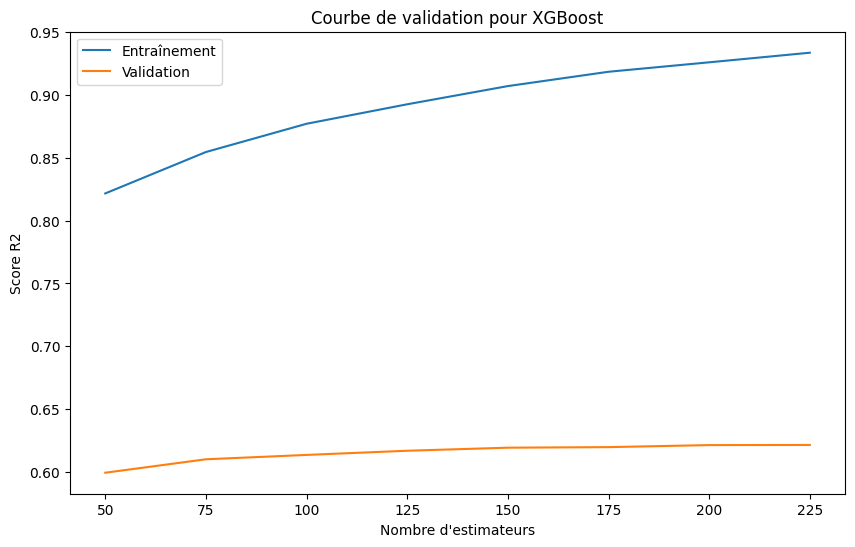

(10600, 34)
(2650, 34)


In [43]:
# Courbe de validation pour XGBoost
param_range = np.arange(50, 250, 25)
train_scores, test_scores = validation_curve(
    grid_search.best_estimator_, X_train, y_train, param_name="xgb__n_estimators", param_range=param_range,
    scoring="r2", cv=5
)

plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Entraînement")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Validation")
plt.title("Courbe de validation pour XGBoost")
plt.xlabel("Nombre d'estimateurs")
plt.ylabel("Score R2")
plt.legend()
plt.show()
print(X_train.shape)
print(X_test.shape)


### Courbe d'apprentissage

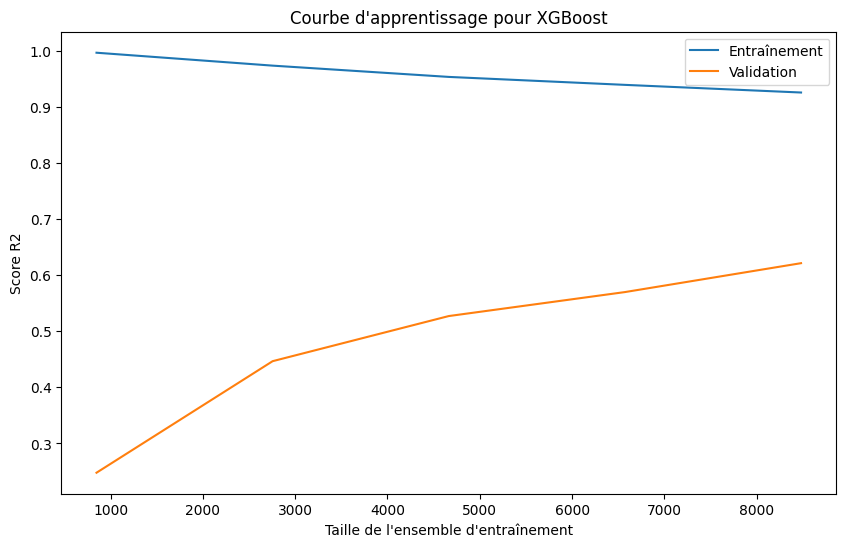

(10600, 34)
(2650, 34)


In [44]:
# Courbe d'apprentissage pour XGBoost

# Obtenir le meilleur estimateur de la recherche de grille
best_estimator = grid_search.best_estimator_

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, scoring="r2", cv=5
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Entraînement")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation")
plt.title("Courbe d'apprentissage pour XGBoost")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score R2")
plt.legend()
plt.show()
print(X_train.shape)
print(X_test.shape)



### Score Final

In [45]:
# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Évaluation des performances du modèle
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)*100
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score sur l'ensemble de test:", r2)
print("Erreur absolue moyenne (MAE) sur l'ensemble de test:  %.2f" % mae)


R2 Score sur l'ensemble de test: 67.12719376949086
Erreur absolue moyenne (MAE) sur l'ensemble de test:  109531.57


### Feature Importance

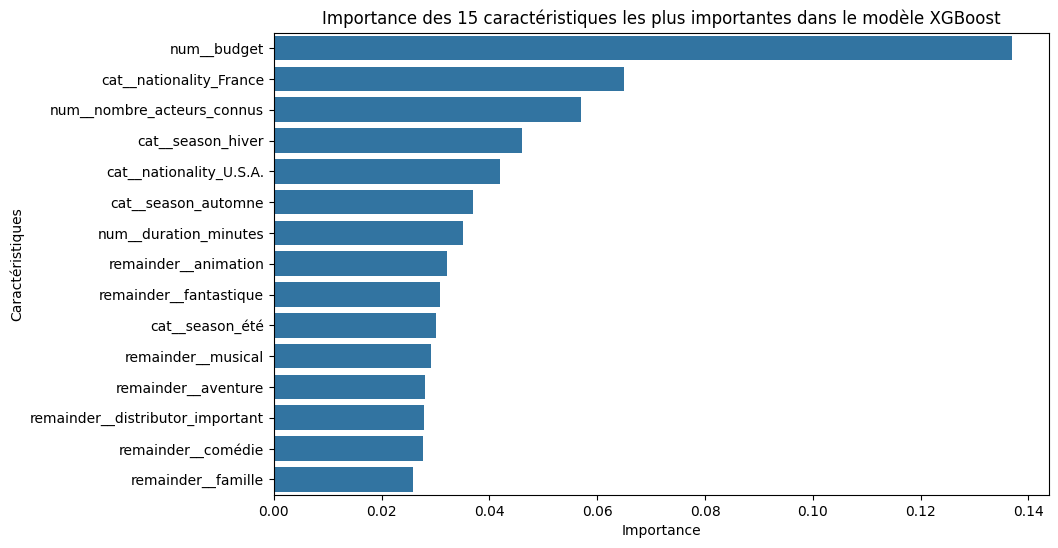

In [46]:
# Réappliquer le prétraitement aux données d'entraînement
X_train_preprocessed = grid_search.best_estimator_.named_steps['preprocessing'].transform(X_train)

# Obtenir les caractéristiques utilisées lors de l'apprentissage du modèle
features = grid_search.best_estimator_.named_steps['preprocessing'].get_feature_names_out()

# Obtenir les importances des caractéristiques à partir du meilleur estimateur
feature_importances = grid_search.best_estimator_.named_steps['xgb'].feature_importances_

# Créer un DataFrame pour afficher les importances des caractéristiques
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Sélectionner les 15 caractéristiques les plus importantes
top_15_features = importance_df.nlargest(15, 'Importance')

# Tracer les importances des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_15_features)
plt.title("Importance des 15 caractéristiques les plus importantes dans le modèle XGBoost")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.show()

In [47]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['duration_minutes',
                                                                          'nombre_acteurs_connus',
                                                                          'budget']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['nationality',
                                                                          'season'])])),
                                       ('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylev...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.01, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 200]})

In [53]:
import joblib

# Enregistrement du modèle sous format pickle
joblib.dump(grid_search, 'model.pkl')

['model.pkl']

In [54]:
test = X.iloc[0]
test

nationality                   U.S.A.
budget                   250000000.0
duration_minutes                 150
season                     printemps
action                             1
animation                          0
arts martiaux                      0
aventure                           0
biopic                             0
bollywood                          0
comédie                            0
comédie dramatique                 0
comédie musicale                   0
divers                             0
drame                              0
epouvante-horreur                  0
erotique                           0
espionnage                         0
expérimental                       0
famille                            0
fantastique                        0
guerre                             0
historique                         0
judiciaire                         0
musical                            0
policier                           0
péplum                             0
r

In [55]:
X.columns

Index(['nationality', 'budget', 'duration_minutes', 'season', 'action',
       'animation', 'arts martiaux', 'aventure', 'biopic', 'bollywood',
       'comédie', 'comédie dramatique', 'comédie musicale', 'divers', 'drame',
       'epouvante-horreur', 'erotique', 'espionnage', 'expérimental',
       'famille', 'fantastique', 'guerre', 'historique', 'judiciaire',
       'musical', 'policier', 'péplum', 'romance', 'science fiction',
       'sport event', 'thriller', 'western', 'nombre_acteurs_connus',
       'distributor_important'],
      dtype='object')

In [56]:
X.dtypes

nationality               object
budget                   float64
duration_minutes           int64
season                    object
action                     int64
animation                  int64
arts martiaux              int64
aventure                   int64
biopic                     int64
bollywood                  int64
comédie                    int64
comédie dramatique         int64
comédie musicale           int64
divers                     int64
drame                      int64
epouvante-horreur          int64
erotique                   int64
espionnage                 int64
expérimental               int64
famille                    int64
fantastique                int64
guerre                     int64
historique                 int64
judiciaire                 int64
musical                    int64
policier                   int64
péplum                     int64
romance                    int64
science fiction            int64
sport event                int64
thriller  

In [52]:
X.columns.shape

(34,)